This idea is based on the solution: https://www.kaggle.com/code/sardorabdirayimov/awesome-nn-titanic-disaster

we will first implement this model on our processed data.

In [5]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_df = pd.read_csv('processed data\processed_train.csv')
test_df = pd.read_csv('processed data\processed_test.csv')

train_df['Transported']

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

In [4]:
X = train_df.copy()
y = X.pop("Transported")

X.sample(10)

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,group_id,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Side_P,Side_S
1418,0,17.0,0,0.0,55.0,913.0,0.0,55.0,230.0,3,1,0,0,1,0,0,0,1
6298,0,53.0,0,0.0,0.0,0.0,0.0,0.0,222.0,3,0,1,0,0,0,1,1,0
4845,0,23.0,0,0.0,306.0,392.0,9.0,13.0,1056.0,1,1,0,0,1,0,0,1,0
4176,0,24.0,0,698.0,0.0,51.0,2.0,4.0,917.0,1,1,0,0,0,0,1,1,0
3177,0,31.0,0,0.0,1216.0,0.0,897.0,478.0,234.0,1,0,1,0,0,0,1,0,1
1536,1,1.0,0,0.0,0.0,0.0,0.0,0.0,252.0,1,1,0,0,0,1,0,0,1
2705,0,38.0,0,1.0,0.0,288.0,0.0,556.0,461.0,1,1,0,0,0,0,1,0,1
8163,0,55.0,0,694.0,0.0,1.0,87.0,0.0,1416.0,2,1,0,0,0,0,1,1,0
8131,1,21.0,0,0.0,0.0,0.0,0.0,0.0,1400.0,1,1,0,0,1,0,0,0,1
1967,0,45.0,0,0.0,0.0,734.0,3.0,5.0,413.0,1,1,0,0,0,1,0,0,1


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)

X_train.shape

(5824, 18)

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.BatchNormalization(input_shape=[18]),
    layers.Dense(1024, activation='relu', input_shape=[18]),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1024, activation='relu'),    
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid'),
])

In [8]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [9]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)


history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=512,
    epochs=100,
    callbacks=[early_stopping],
)

Epoch 1/100
12/12 [==============================] - 2s 89ms/step - loss: 0.8987 - binary_accuracy: 0.6812 - val_loss: 0.5759 - val_binary_accuracy: 0.6772
Epoch 2/100
12/12 [==============================] - 0s 31ms/step - loss: 0.6301 - binary_accuracy: 0.7483 - val_loss: 0.5616 - val_binary_accuracy: 0.6574
Epoch 3/100
12/12 [==============================] - 0s 28ms/step - loss: 0.5343 - binary_accuracy: 0.7556 - val_loss: 0.5924 - val_binary_accuracy: 0.6483
Epoch 4/100
12/12 [==============================] - 0s 27ms/step - loss: 0.4925 - binary_accuracy: 0.7707 - val_loss: 0.5522 - val_binary_accuracy: 0.7069
Epoch 5/100
12/12 [==============================] - 0s 32ms/step - loss: 0.4913 - binary_accuracy: 0.7586 - val_loss: 0.5592 - val_binary_accuracy: 0.7110
Epoch 6/100
12/12 [==============================] - 0s 28ms/step - loss: 0.4695 - binary_accuracy: 0.7773 - val_loss: 0.5580 - val_binary_accuracy: 0.7135
Epoch 7/100
12/12 [==============================] - 0s 32ms/ste

In [10]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.803153,0.714801,0.575901,0.677239
1,0.607610,0.752404,0.561622,0.657372
2,0.531709,0.752404,0.592371,0.648310
3,0.496498,0.768201,0.552199,0.706867
4,0.493292,0.768201,0.559226,0.711049


Best Validation Loss: 0.4144
Best Validation Accuracy: 0.8052


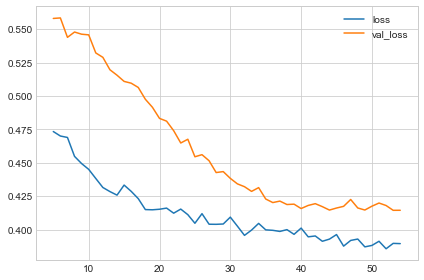

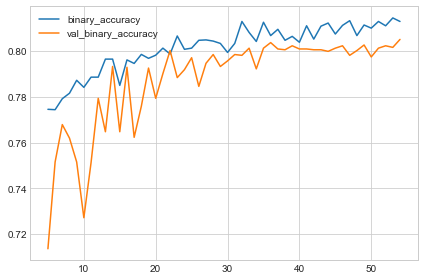

In [13]:
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

In [17]:
from sklearn.metrics import f1_score
prd_valid = model.predict(X_test)
prd_valid[:,]

array([[0.82750595],
       [0.15838236],
       [0.45981878],
       ...,
       [0.2584917 ],
       [0.6182191 ],
       [0.2976631 ]], dtype=float32)